In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

## Introduction to neural network classicfication with TensorFlow

Types of classification problems:
* Binary classification
* Multiclass classification
* Multilabel classification

### Creating data to view and fit

In [2]:
from sklearn.datasets import make_circles

# Make 1000 examples

n_samples = 1000

X, y = make_circles(n_samples, noise=0.03, random_state=42)

In [3]:
# Check out the features
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [4]:
# Check out the labels
y

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,

In [5]:
circles = pd.DataFrame({"X0":X[:,0], "X1":X[:, 1], "label":y})

In [6]:
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


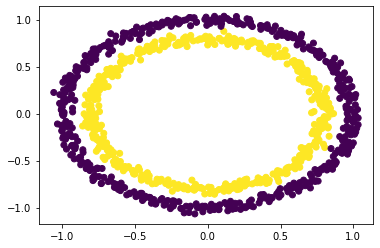

In [7]:
plt.scatter(circles['X0'], circles["X1"], c=circles["label"])

### Checking the shapes

In [8]:
X.shape, y.shape

((1000, 2), (1000,))

### Prepare the data

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Create a model

In [11]:
# Random seed
tf.random.set_seed(42)

# Create a model
model_0 = tf.keras.Sequential(
    [tf.keras.layers.Input(shape=(2,)),
     tf.keras.layers.Dense(32, activation='relu'),
     tf.keras.layers.Dense(64, activation='relu'),
     tf.keras.layers.Dense(1, activation='sigmoid')    
    ]
)

model_0.compile(loss=tf.keras.losses.binary_crossentropy, 
                optimizer=tf.keras.optimizers.Adam(),
               metrics=tf.keras.metrics.BinaryAccuracy())

history_0 = model_0.fit(X_train, y_train, epochs=100)

Epoch 1/100
25/25 [==============================] - 0s 599us/step - loss: 0.6887 - binary_accuracy: 0.5013
Epoch 2/100
25/25 [==============================] - 0s 644us/step - loss: 0.6844 - binary_accuracy: 0.5000
Epoch 3/100
25/25 [==============================] - 0s 758us/step - loss: 0.6791 - binary_accuracy: 0.5000
Epoch 4/100
25/25 [==============================] - 0s 949us/step - loss: 0.6755 - binary_accuracy: 0.5300
Epoch 5/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6691 - binary_accuracy: 0.5025
Epoch 6/100
25/25 [==============================] - 0s 835us/step - loss: 0.6612 - binary_accuracy: 0.5312
Epoch 7/100
25/25 [==============================] - 0s 889us/step - loss: 0.6507 - binary_accuracy: 0.7150
Epoch 8/100
25/25 [==============================] - 0s 998us/step - loss: 0.6373 - binary_accuracy: 0.6775
Epoch 9/100
25/25 [==============================] - 0s 750us/step - loss: 0.6237 - binary_accuracy: 0.7262
Epoch 10/100
25/25 [==========

In [12]:
model_0.evaluate(X_test, y_test)

7/7 [==============================] - 0s 571us/step - loss: 0.0125 - binary_accuracy: 1.0000


[0.01245791930705309, 1.0]

In [13]:
preds_0_all = model_0.predict(X)

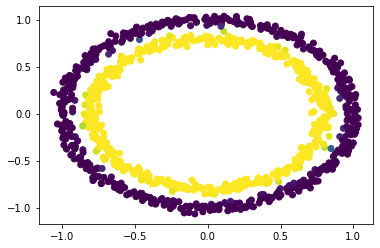

In [14]:
plt.scatter(circles['X0'], circles["X1"], c=preds_0_all)

(array([492.,   6.,   2.,   0.,   0.,   0.,   0.,   0.,   1., 499.]),
 array([2.9409111e-07, 9.9999860e-02, 1.9999942e-01, 2.9999900e-01,
        3.9999855e-01, 4.9999812e-01, 5.9999770e-01, 6.9999725e-01,
        7.9999679e-01, 8.9999640e-01, 9.9999595e-01], dtype=float32),
 <BarContainer object of 10 artists>)

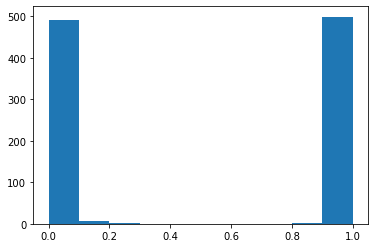

In [15]:
plt.hist(preds_0_all)

In [16]:
X_train.shape, y_train.shape

((800, 2), (800,))

In [17]:
# Creating a Udemy course model

# Set te random seed 
tf.random.set_seed(42)

# 1. Create a model

model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1),
    
])

# 2. Compile the model

model_1.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

# 3. Fit the model

history_1 = model_1.fit(X_train, y_train, epochs=200,verbose=0)

In [18]:
model_1.evaluate(X_test, y_test)

7/7 [==============================] - 0s 1ms/step - loss: 0.6984 - accuracy: 0.4600


[0.6983896493911743, 0.46000000834465027]

In [19]:
# To visualize our model's predictions, we code a function called plot_decision_boundary

def plot_decision_boundary(model, X, y):
    
    # Define axes boundaries of the plot and create a meshgrid
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), 
                         np.linspace(y_min, y_max, 100))
    
    # Create X values
    x_in = np.c_[xx.ravel(), yy.ravel()] 
    
    # Make predictions
    y_pred = model.predict(x_in)
    
    # Check for multi-class
    if len(y_pred[0]) > 1:
        print('This is a multiclass classificaion problem')
        
        # We have to reshape our predictions to get them ready for plotting
        y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
    else:
        print('This is binary classification problem')
        y_pred = np.round(y_pred).reshape(xx.shape)
        
    # Plot the decision boundary
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    

This is binary classification problem


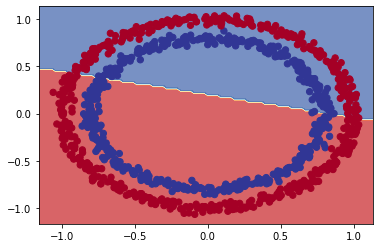

In [20]:
plot_decision_boundary(model=model_1, X=X, y=y)

In [21]:
# Let's see if our model can be usedfor solving regression problems

tf.random.set_seed(41)

# Create regression data

X_regression = tf.range(0, 1000, 5).numpy().ravel()
y_regression = tf.range(100, 1100, 5).numpy().ravel()

X_regression, y_regression

# Split our data to training and testing sets

X_reg_train, X_reg_test, y_reg_train, y_reg_test = train_test_split(X_regression, y_regression, test_size=0.2)

In [22]:
X_reg_train.shape, y_reg_train.shape

((160,), (160,))

In [23]:
# Amending the model

# Set te random seed 
tf.random.set_seed(42)

# 1. Create a model

model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1),
    
])

# 2. Compile the model

model_2.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['mae']
)

# 3. Fit the model

history_2 = model_2.fit(X_reg_train, y_reg_train, epochs=200)

Epoch 1/200
5/5 [==============================] - 0s 2ms/step - loss: 302.1063 - mae: 302.1063
Epoch 2/200
5/5 [==============================] - 0s 805us/step - loss: 153.5314 - mae: 153.5314
Epoch 3/200
5/5 [==============================] - 0s 1ms/step - loss: 57.8221 - mae: 57.8221
Epoch 4/200
5/5 [==============================] - 0s 2ms/step - loss: 87.6693 - mae: 87.6693
Epoch 5/200
5/5 [==============================] - 0s 2ms/step - loss: 67.1015 - mae: 67.1015
Epoch 6/200
5/5 [==============================] - 0s 997us/step - loss: 48.5410 - mae: 48.5410
Epoch 7/200
5/5 [==============================] - 0s 997us/step - loss: 47.7179 - mae: 47.7179
Epoch 8/200
5/5 [==============================] - 0s 2ms/step - loss: 47.2246 - mae: 47.2246
Epoch 9/200
5/5 [==============================] - 0s 599us/step - loss: 44.8849 - mae: 44.8849
Epoch 10/200
5/5 [==============================] - 0s 798us/step - loss: 42.7299 - mae: 42.7299
Epoch 11/200
5/5 [===========================

In [24]:
# Make predictions
y_reg_preds = model_2.predict(X_reg_test)

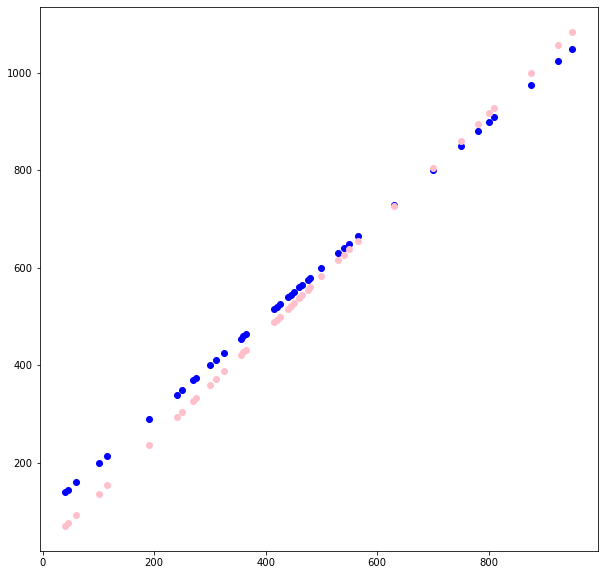

In [25]:
# Plot model's predictions against our regression data

plt.figure(figsize=(10,10))
plt.scatter(X_reg_test, y_reg_test, c='blue')
plt.scatter(X_reg_test, y_reg_preds, c='pink')

### Introducing nonlinearity

In [26]:
# Set the random seed
tf.random.set_seed(42)

# Create a model with non-linear activation
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.relu)
])

# Compile the model

model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(lr=0.001),
               metrics=['accuracy'])

# Fit the model

history_3 = model_3.fit(X_train, y_train, epochs=100)

Epoch 1/100
25/25 [==============================] - 0s 1ms/step - loss: 4.3385 - accuracy: 0.4600
Epoch 2/100
25/25 [==============================] - 0s 957us/step - loss: 4.2259 - accuracy: 0.4313
Epoch 3/100
25/25 [==============================] - 0s 957us/step - loss: 4.1368 - accuracy: 0.4187
Epoch 4/100
25/25 [==============================] - 0s 1ms/step - loss: 4.0682 - accuracy: 0.4112
Epoch 5/100
25/25 [==============================] - 0s 678us/step - loss: 3.9607 - accuracy: 0.4137
Epoch 6/100
25/25 [==============================] - 0s 958us/step - loss: 3.8429 - accuracy: 0.4175
Epoch 7/100
25/25 [==============================] - 0s 922us/step - loss: 3.7821 - accuracy: 0.4300
Epoch 8/100
25/25 [==============================] - 0s 718us/step - loss: 3.7582 - accuracy: 0.4387
Epoch 9/100
25/25 [==============================] - 0s 758us/step - loss: 3.6799 - accuracy: 0.4475
Epoch 10/100
25/25 [==============================] - 0s 717us/step - loss: 3.5987 - accuracy: 

This is binary classification problem


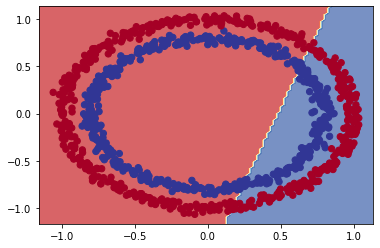

In [27]:
plot_decision_boundary(model=model_3, X=X, y=y)

In [28]:
# Set the random seed
tf.random.set_seed(42)

# Create a model with non-linear activation
model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid)
])

# Compile the model

model_4.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(lr=0.001),
               metrics=['accuracy'])

# Fit the model

history_4 = model_4.fit(X_train, y_train, epochs=300)

Epoch 1/300
25/25 [==============================] - 0s 1ms/step - loss: 0.7068 - accuracy: 0.5013
Epoch 2/300
25/25 [==============================] - 0s 2ms/step - loss: 0.7048 - accuracy: 0.4925
Epoch 3/300
25/25 [==============================] - 0s 1ms/step - loss: 0.7030 - accuracy: 0.4988
Epoch 4/300
25/25 [==============================] - 0s 996us/step - loss: 0.7018 - accuracy: 0.4988
Epoch 5/300
25/25 [==============================] - 0s 3ms/step - loss: 0.7009 - accuracy: 0.4888
Epoch 6/300
25/25 [==============================] - 0s 2ms/step - loss: 0.6997 - accuracy: 0.4837
Epoch 7/300
25/25 [==============================] - 0s 1ms/step - loss: 0.6989 - accuracy: 0.4837
Epoch 8/300
25/25 [==============================] - 0s 838us/step - loss: 0.6982 - accuracy: 0.4837
Epoch 9/300
25/25 [==============================] - 0s 798us/step - loss: 0.6977 - accuracy: 0.4725
Epoch 10/300
25/25 [==============================] - 0s 1ms/step - loss: 0.6969 - accuracy: 0.4750
Epo

In [29]:
model_4.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (32, 4)                   12        
_________________________________________________________________
dense_11 (Dense)             (32, 1)                   5         
Total params: 17
Trainable params: 17
Non-trainable params: 0
_________________________________________________________________


This is binary classification problem


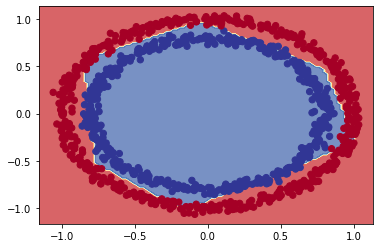

In [30]:
plot_decision_boundary(model=model_4, X=X, y=y)

In [31]:
m4_weights = model_4.trainable_weights[0]

In [32]:
m4_variables = model_4.trainable_variables[1]

In [33]:
m4_weights, m4_variables

(<tf.Variable 'dense_10/kernel:0' shape=(2, 4) dtype=float32, numpy=
 array([[ 1.4403735 , -2.6329567 , -0.16415556,  1.0965487 ],
        [-2.2428408 ,  0.13664788,  0.3819483 ,  2.348009  ]],
       dtype=float32)>,
 <tf.Variable 'dense_10/bias:0' shape=(4,) dtype=float32, numpy=array([-0.0741201, -0.2745177,  1.5992774, -0.4084474], dtype=float32)>)

### Checking out the sigmoid and relu and linear functions

In [34]:
A = tf.cast(tf.range(-10, 10), tf.float32)

In [35]:
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

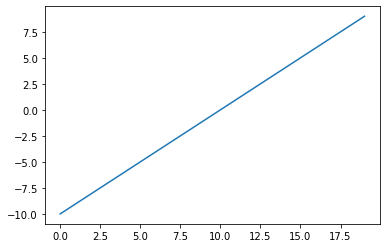

In [36]:
plt.plot(A)

In [37]:
# Create function that returns 1 / (1+ exp(-x))

def sigmoid_funtion(x):
    return (1 / (1 + np.exp(-x)))

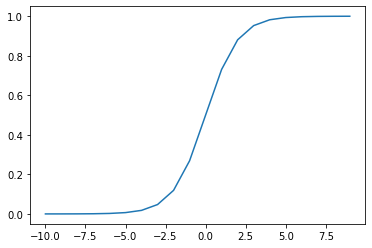

In [38]:
# Apply sigmoid_function to our tensor A

plt.plot(A, sigmoid_funtion(A))

In [39]:
# Create function that returns max(0, x)

def relu_function(x):
    return np.maximum(0, x)

# Pass the tensor to relu_function

relu_function(A)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)

In [40]:
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

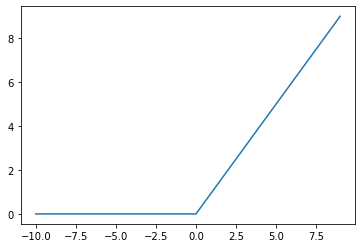

In [41]:
plt.plot(A, relu_function(A))

In [42]:
# Let's try linear activation function

tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

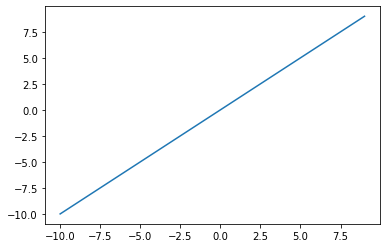

In [43]:
plt.plot(A, tf.keras.activations.linear(A))

### Plot the curves

In [44]:
history_4.history.keys()

dict_keys(['loss', 'accuracy'])

In [45]:
history_4_df = pd.DataFrame(history_4.history)

In [46]:
history_4_df

,loss,accuracy
0,0.706754,0.50125
1,0.704759,0.49250
2,0.703032,0.49875
3,0.701784,0.49875
4,0.700853,0.48875
...,...,...
295,0.444766,0.93000
296,0.444121,0.93250
297,0.442964,0.93125
298,0.441946,0.93375


<AxesSubplot:>

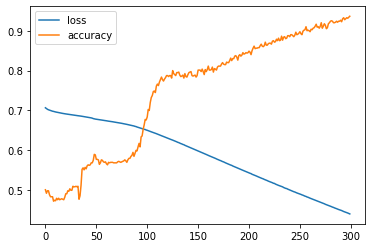

In [47]:
history_4_df.plot()

### Finding best learning rate

To find ideal learning rate, we use following steps:

* A learning rate callback
* Another model
* A modified loss curves plot

In [48]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model

model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# 2. Compile the model

model_5.compile(loss='binary_crossentropy',
               optimizer='Adam',
               metrics=['accuracy'])

# 3. Create a learning rate callback

lr_scheduler_5 = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

# 4. Fit the model

history_5 = model_5.fit(X_train, y_train, epochs=100, callbacks=[lr_scheduler_5])

Epoch 1/100
25/25 [==============================] - 0s 983us/step - loss: 0.6917 - accuracy: 0.5000
Epoch 2/100
25/25 [==============================] - 0s 835us/step - loss: 0.6910 - accuracy: 0.4988
Epoch 3/100
25/25 [==============================] - 0s 753us/step - loss: 0.6903 - accuracy: 0.4975
Epoch 4/100
25/25 [==============================] - 0s 799us/step - loss: 0.6897 - accuracy: 0.5075
Epoch 5/100
25/25 [==============================] - 0s 800us/step - loss: 0.6888 - accuracy: 0.5063
Epoch 6/100
25/25 [==============================] - 0s 750us/step - loss: 0.6881 - accuracy: 0.5075
Epoch 7/100
25/25 [==============================] - 0s 730us/step - loss: 0.6873 - accuracy: 0.5050
Epoch 8/100
25/25 [==============================] - 0s 713us/step - loss: 0.6864 - accuracy: 0.5088
Epoch 9/100
25/25 [==============================] - 0s 718us/step - loss: 0.6856 - accuracy: 0.5038
Epoch 10/100
25/25 [==============================] - 0s 813us/step - loss: 0.6849 - accura

<AxesSubplot:>

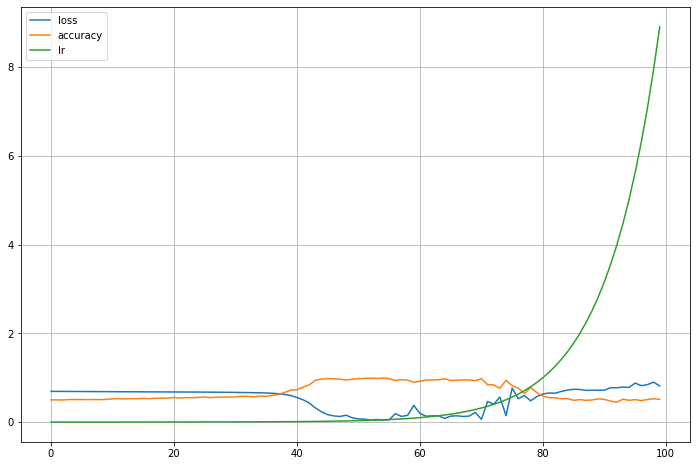

In [49]:
pd.DataFrame(history_5.history).plot(figsize=(12, 8), grid=True)

In [50]:
lr_scheduler_5.schedule

<function __main__.<lambda>(epoch)>

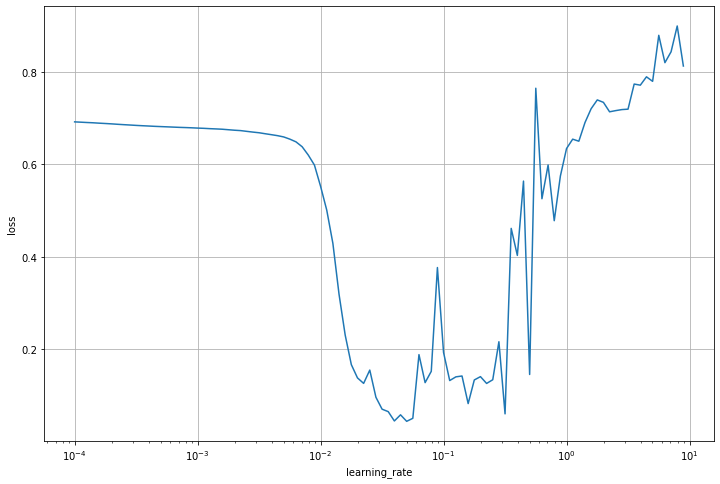

In [51]:
# Plot learning rate against the loss

history_5_df = pd.DataFrame(history_5.history)

plt.figure(figsize=(12, 8))
ax = plt.plot(history_5_df.lr, history_5_df.loss)
plt.xlabel('learning_rate')
plt.ylabel('loss')
plt.xscale('log')
plt.grid(visible=True, which='major', axis='both')
plt.show()

**Tip**: Good practice is to choose learning rate in the point where the curve has stil negative slope **and** the value is relatively low

In [52]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model

model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# 2. Compile the model

model_6.compile(loss='binary_crossentropy',
               optimizer=tf.keras.optimizers.Adam(lr=0.02),
               metrics=['accuracy'])

# 3. Fit the model

history_6 = model_6.fit(X_train, y_train, epochs=20)

Epoch 1/20
25/25 [==============================] - 0s 568us/step - loss: 0.6801 - accuracy: 0.5863
Epoch 2/20
25/25 [==============================] - 0s 598us/step - loss: 0.6694 - accuracy: 0.5888
Epoch 3/20
25/25 [==============================] - 0s 679us/step - loss: 0.6533 - accuracy: 0.6075
Epoch 4/20
25/25 [==============================] - 0s 598us/step - loss: 0.6342 - accuracy: 0.6475
Epoch 5/20
25/25 [==============================] - 0s 758us/step - loss: 0.5787 - accuracy: 0.7200
Epoch 6/20
25/25 [==============================] - 0s 646us/step - loss: 0.5361 - accuracy: 0.7500
Epoch 7/20
25/25 [==============================] - 0s 798us/step - loss: 0.4275 - accuracy: 0.8662
Epoch 8/20
25/25 [==============================] - 0s 779us/step - loss: 0.3479 - accuracy: 0.9137
Epoch 9/20
25/25 [==============================] - 0s 744us/step - loss: 0.2778 - accuracy: 0.9350
Epoch 10/20
25/25 [==============================] - 0s 735us/step - loss: 0.2362 - accuracy: 0.9538

In [53]:
# Evaluate model 6

model_6.evaluate(X_test, y_test)

7/7 [==============================] - 0s 570us/step - loss: 0.2150 - accuracy: 0.9100


[0.21504615247249603, 0.9100000262260437]

This is binary classification problem
This is binary classification problem


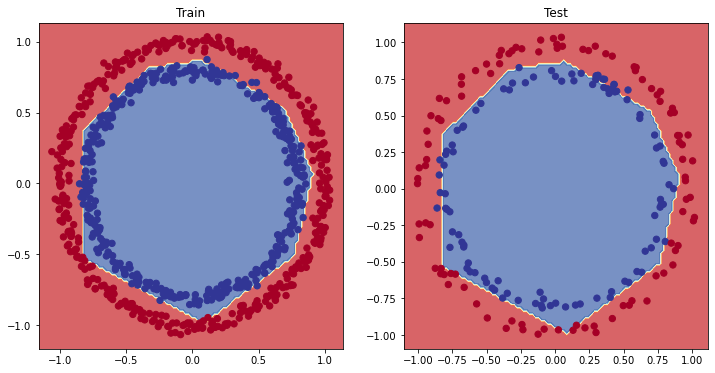

In [54]:
# plot the decision boundaries for training and test sets

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Train')
plot_decision_boundary(model_6, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title('Test')
plot_decision_boundary(model_6, X_test, y_test)
plt.show()

### Other methods to evaluate classification models

* (Accuracy)
* Precision
* Recall
* F-1 Score
* Confusion matrix

In [55]:
loss, accuracy = model_6.evaluate(X_test, y_test)

7/7 [==============================] - 0s 570us/step - loss: 0.2150 - accuracy: 0.9100


In [56]:
loss

0.21504615247249603

In [57]:
from sklearn.metrics import confusion_matrix

In [58]:
y_pred_6 = model_6.predict(X_test).ravel()

y_pred_6, y_test


(array([9.34637189e-01, 8.56918097e-03, 9.81402636e-01, 9.24646854e-04,
        6.18677080e-01, 6.93782151e-01, 4.12523746e-04, 1.00538135e-03,
        9.21275973e-01, 5.64554334e-03, 3.94943357e-02, 9.93967414e-01,
        1.09257584e-04, 8.94489884e-01, 5.44638932e-02, 9.83731925e-01,
        6.43288255e-01, 1.09604001e-03, 8.29425275e-01, 3.62386107e-02,
        2.30208039e-03, 8.79377127e-04, 9.18586314e-01, 2.62260437e-04,
        1.09219036e-04, 3.68925929e-03, 2.08030343e-02, 1.70348287e-02,
        4.07478213e-03, 9.49010134e-01, 9.85829711e-01, 2.20344118e-05,
        3.12966704e-02, 9.91165757e-01, 2.46736407e-03, 9.30656254e-01,
        4.57364142e-01, 9.64649320e-01, 8.99539471e-01, 8.88077736e-01,
        8.86994123e-01, 7.10908175e-01, 8.65766048e-01, 2.31941640e-02,
        5.07667661e-03, 6.38980627e-01, 4.11038399e-02, 2.93403864e-04,
        9.98114824e-01, 6.72684968e-01, 2.41622329e-03, 1.27607584e-03,
        1.43551528e-02, 6.80706799e-02, 9.61630225e-01, 3.579440

In [59]:
y_pred_6_round = tf.round(y_pred_6)
y_pred_6_round[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.], dtype=float32)>

In [60]:
cm_6 = confusion_matrix(y_test, y_pred_6_round)

In [61]:
cm_6

array([[99,  1],
       [17, 83]], dtype=int64)

### Our own plot_confusion_matrix function

In [62]:
import itertools

cm_6_normal = cm_6.astype('float') / cm_6.sum(axis=1)[:, np.newaxis]
n_classes= cm_6.shape[0]

In [63]:
cm_6_normal

array([[0.99, 0.01],
       [0.17, 0.83]])

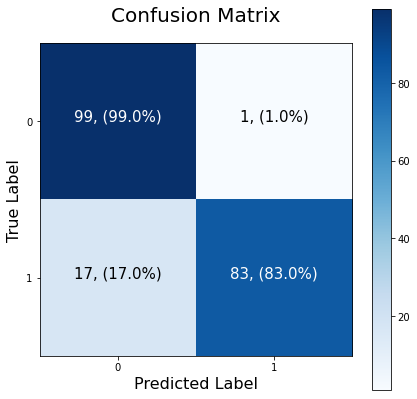

In [64]:
fig, ax = plt.subplots(figsize=(7, 7))
cax = ax.matshow(cm_6, cmap=plt.cm.Blues)
fig.colorbar(cax)

# Create classes
classes = False

if classes:
    labels = classes
else:
    labels = np.arange(cm_6.shape[0])

# Label the axes
ax.set(xlabel='Predicted Label',
      ylabel='True Label',
      xticks=np.arange(n_classes),
      yticks=np.arange(n_classes),
      xticklabels=labels,
      yticklabels=labels)

# Add the title
plt.title('Confusion Matrix', x=0.5, y=1.05)

# Set x-axis labels to bottom
ax.xaxis.set_label_position('bottom')
ax.xaxis.tick_bottom()

# Adjust label size
ax.yaxis.label.set_size(16)
ax.xaxis.label.set_size(16)
ax.title.set_size(20)
ax.title.set_position

# Set the thershold
threshold = (cm_6.max() + cm_6.min()) / 2.

# Plot the text on each cell
for i, j in itertools.product(range(cm_6.shape[0]), range(cm_6.shape[1])):
    plt.text(j, i, f'{cm_6[i, j]}, ({cm_6_normal[i, j]*100:.1f}%)',
            horizontalalignment='center',
            color='white' if cm_6[i, j] > threshold else 'black',
            size=15)

In [65]:
# Define the function

def plot_confusion_matrix(y_pred=0, y_true=0, classes=None, figsize=(10, 10)):
    import itertools
    from sklearn.metrics import confusion_matrix
    cm_6 = confusion_matrix(y_true, tf.round(y_pred))
    # Normalize the confusion matrix
    cm_6_normal = cm_6.astype('float') / cm_6.sum(axis=1)[:, np.newaxis]
    n_classes= cm_6.shape[0]
    
    fig, ax = plt.subplots(figsize=figsize)
    cax = ax.matshow(cm_6, cmap=plt.cm.Blues)
    fig.colorbar(cax)

    # Create classes

    if classes:
        labels = classes
    else:
        labels = np.arange(cm_6.shape[0])

    # Label the axes
    ax.set(xlabel='Predicted Label',
          ylabel='True Label',
          xticks=np.arange(len(labels)),
          yticks=np.arange(len(labels)),
          xticklabels=labels,
          yticklabels=labels)

    # Add the title
    plt.title('Confusion Matrix', x=0.5, y=1.05)

    # Set x-axis labels to bottom
    ax.xaxis.set_label_position('bottom')
    ax.xaxis.tick_bottom()

    # Adjust label size
    ax.yaxis.label.set_size(16)
    ax.xaxis.label.set_size(16)
    ax.title.set_size(20)
    ax.title.set_position

    # Set the thershold
    threshold = (cm_6.max() + cm_6.min()) / 2.

    # Plot the text on each cell
    for i, j in itertools.product(range(cm_6.shape[0]), range(cm_6.shape[1])):
        plt.text(j, i, f'{cm_6[i, j]}, ({cm_6_normal[i, j]*100:.1f}%)',
                horizontalalignment='center',
                color='white' if cm_6[i, j] > threshold else 'black',
                size=15)

## Multiclass classification

### Prepare the data

In [66]:
# Create a dataset

from tensorflow.keras.datasets import fashion_mnist

(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

In [67]:
train_data.shape

(60000, 28, 28)

(<matplotlib.image.AxesImage at 0x13a09609748>, (28, 28), 9)

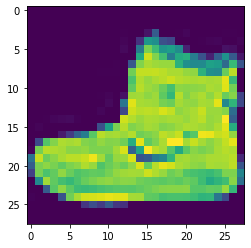

In [68]:
# Check the data example

plt.imshow(train_data[0]), train_data[0].shape, train_labels[0]

In [69]:
# Create a list of class labels

class_names=['T-shirt/top', 'Trouser', 
             'Pullover', 'Dress', 
            'Coat', 'Sandal',
            'Shirt', 'Sneaker',
            'Bag', 'Ankle boot']

len(class_names)

10

Text(0.5, 1.0, 'Ankle boot')

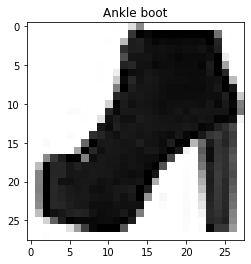

In [70]:
# Plot image and its label
index_of_choice = 44
plt.imshow(train_data[index_of_choice], cmap=plt.cm.binary)
plt.title(f'{class_names[train_labels[index_of_choice]]}')

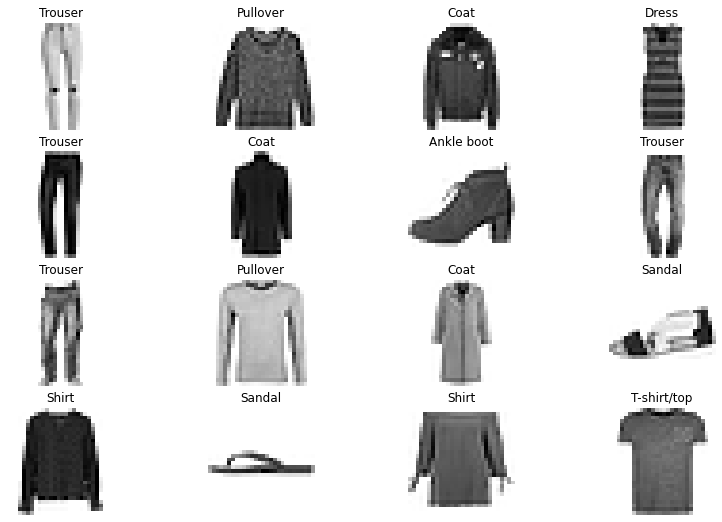

In [71]:
# Plot multiple random images of fashion MNIST
import random
show_many = 16

plt.figure(figsize=(11+np.log(show_many), 11+np.log(show_many)))
for i in range(show_many):
    ax = plt.subplot(int(show_many/round(np.sqrt(show_many))+2), int(show_many/round(np.sqrt(show_many))), i+1)
    random_index = random.choice(range(len(train_data)))
    plt.imshow(train_data[random_index], cmap=plt.cm.binary)
    plt.title(f'{class_names[train_labels[random_index]]}')
    plt.axis(False)


### Create a model

Architecture specification:
* Input shape = (28, 28) -> (784,)
* Output shape = (10, )
* Loss function categorical crossentropy
* Output activation = 'softmax' (rather than 'sigmoid')

In [72]:
# Set random seed
tf.random.set_seed(42)

# Create a model 
model_7 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(784, activation='relu'),
    tf.keras.layers.Dense(49, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model_7.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(lr=0.001),
               metrics=['accuracy'])

# Fit the model

history_7 = model_7.fit(train_data, 
                        train_labels, 
                        epochs=20, 
                        batch_size=1000, validation_data=(test_data, test_labels), validation_batch_size=1000)

Epoch 1/20
60/60 [==============================] - 2s 31ms/step - loss: 15.5365 - accuracy: 0.2938 - val_loss: 1.8189 - val_accuracy: 0.3380
Epoch 2/20
60/60 [==============================] - 2s 26ms/step - loss: 1.6774 - accuracy: 0.3958 - val_loss: 1.5639 - val_accuracy: 0.4271
Epoch 3/20
60/60 [==============================] - 2s 26ms/step - loss: 1.4244 - accuracy: 0.4970 - val_loss: 1.3506 - val_accuracy: 0.5295
Epoch 4/20
60/60 [==============================] - 1s 23ms/step - loss: 1.2945 - accuracy: 0.5440 - val_loss: 1.2984 - val_accuracy: 0.5510
Epoch 5/20
60/60 [==============================] - 1s 25ms/step - loss: 1.2405 - accuracy: 0.5530 - val_loss: 1.2616 - val_accuracy: 0.5416
Epoch 6/20
60/60 [==============================] - 1s 21ms/step - loss: 1.1982 - accuracy: 0.5584 - val_loss: 1.2125 - val_accuracy: 0.5554
Epoch 7/20
60/60 [==============================] - 1s 22ms/step - loss: 1.1686 - accuracy: 0.5611 - val_loss: 1.1921 - val_accuracy: 0.5565
Epoch 8/20
6

In [73]:
model_7.evaluate(test_data, test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 1.0369 - accuracy: 0.5674


[1.0368989706039429, 0.5673999786376953]

In [74]:
# Check the model summary
model_7.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 784)               615440    
_________________________________________________________________
dense_19 (Dense)             (None, 49)                38465     
_________________________________________________________________
dense_20 (Dense)             (None, 10)                500       
Total params: 654,405
Trainable params: 654,405
Non-trainable params: 0
_________________________________________________________________


In [75]:
# Check the min and max values of the training data
train_data.min(), train_data.max()

(0, 255)

In [76]:
# Normalize the data
train_data_norm = train_data / 255.0
test_data_norm = test_data / 255.0

# Check teh min and max values of the scaled data
train_data_norm.min(), test_data_norm.min(), train_data_norm.max(), test_data_norm.max()

(0.0, 0.0, 1.0, 1.0)

In [77]:
# Set random seed
tf.random.set_seed(42)

# Create a model 
model_8 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(784, activation='relu'),
    tf.keras.layers.Dense(49, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model_8.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(lr=0.001),
               metrics=['accuracy'])

# Fit the model

history_8 = model_8.fit(train_data_norm, 
                        train_labels, 
                        epochs=20,
                        batch_size=1000, 
                        validation_data=(test_data_norm, test_labels), 
                        validation_batch_size=1000)

Epoch 1/20
60/60 [==============================] - 2s 26ms/step - loss: 0.7040 - accuracy: 0.7660 - val_loss: 0.4949 - val_accuracy: 0.8293
Epoch 2/20
60/60 [==============================] - 1s 23ms/step - loss: 0.4365 - accuracy: 0.8468 - val_loss: 0.4360 - val_accuracy: 0.8492
Epoch 3/20
60/60 [==============================] - 1s 24ms/step - loss: 0.3868 - accuracy: 0.8652 - val_loss: 0.4134 - val_accuracy: 0.8537
Epoch 4/20
60/60 [==============================] - 1s 23ms/step - loss: 0.3645 - accuracy: 0.8712 - val_loss: 0.3889 - val_accuracy: 0.8622
Epoch 5/20
60/60 [==============================] - 1s 22ms/step - loss: 0.3332 - accuracy: 0.8814 - val_loss: 0.4015 - val_accuracy: 0.8596
Epoch 6/20
60/60 [==============================] - 1s 24ms/step - loss: 0.3258 - accuracy: 0.8825 - val_loss: 0.3641 - val_accuracy: 0.8689
Epoch 7/20
60/60 [==============================] - 1s 23ms/step - loss: 0.3084 - accuracy: 0.8887 - val_loss: 0.3663 - val_accuracy: 0.8691
Epoch 8/20
60

In [78]:
model_8.evaluate(test_data_norm, test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.3173 - accuracy: 0.8922


[0.31729650497436523, 0.8921999931335449]

In [79]:
history_7_df = pd.DataFrame(history_7.history)
history_8_df = pd.DataFrame(history_8.history)

<AxesSubplot:>

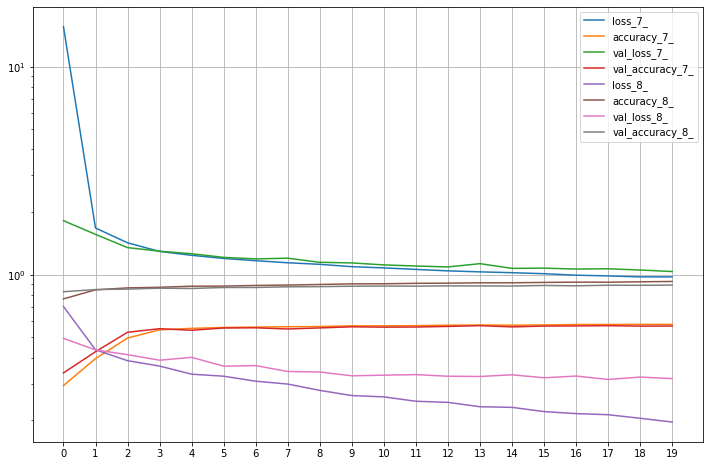

In [80]:
# Compare histories of normalized and nob-normalized data fed models
history_7_df.join(history_8_df, lsuffix='_7_', rsuffix='_8_').plot(logy=True,
                                                                  grid=True,
                                                                  figsize=(12, 8),
                                                                  xticks=[x for x in range(0,20)])

### Finding ideal learning rate

In [81]:
# Set random seed
tf.random.set_seed(42)

# Create a model 
model_9 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(784, activation='relu'),
    tf.keras.layers.Dense(49, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model_9.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(),
               metrics=['accuracy'])

# Create a callback scheduler 
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

# Fit the model

history_9 = model_9.fit(train_data_norm, 
                        train_labels, 
                        epochs=40,
                        batch_size=1000, 
                        validation_data=(test_data_norm, test_labels), 
                        validation_batch_size=1000,
                       callbacks=[lr_scheduler])


Epoch 1/40
60/60 [==============================] - 2s 26ms/step - loss: 0.7040 - accuracy: 0.7660 - val_loss: 0.4949 - val_accuracy: 0.8293
Epoch 2/40
60/60 [==============================] - 1s 22ms/step - loss: 0.4359 - accuracy: 0.8474 - val_loss: 0.4359 - val_accuracy: 0.8492
Epoch 3/40
60/60 [==============================] - 1s 22ms/step - loss: 0.3875 - accuracy: 0.8640 - val_loss: 0.4006 - val_accuracy: 0.8577
Epoch 4/40
60/60 [==============================] - 1s 22ms/step - loss: 0.3520 - accuracy: 0.8756 - val_loss: 0.3995 - val_accuracy: 0.8568
Epoch 5/40
60/60 [==============================] - 1s 22ms/step - loss: 0.3376 - accuracy: 0.8787 - val_loss: 0.3695 - val_accuracy: 0.8678
Epoch 6/40
60/60 [==============================] - 1s 22ms/step - loss: 0.3194 - accuracy: 0.8842 - val_loss: 0.3702 - val_accuracy: 0.8646
Epoch 7/40
60/60 [==============================] - 1s 23ms/step - loss: 0.3061 - accuracy: 0.8879 - val_loss: 0.3745 - val_accuracy: 0.8636
Epoch 8/40
60

In [82]:
history_9_df = pd.DataFrame(history_9.history)

<AxesSubplot:>

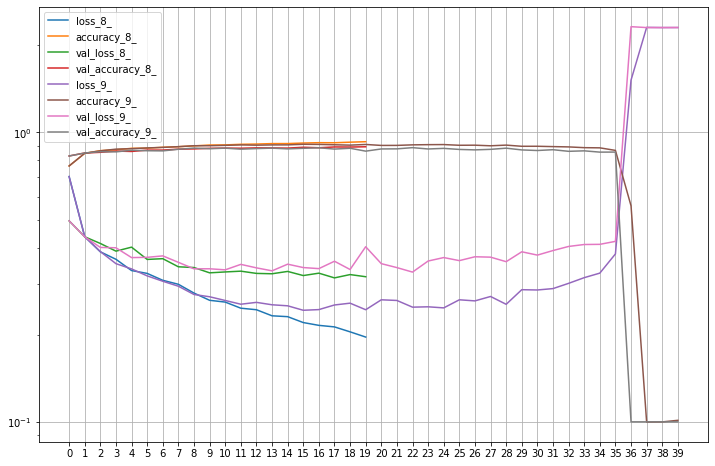

In [83]:
# Compare histories of normalized and nob-normalized data fed models
history_8_df.join(history_9_df.drop(labels='lr', axis=1), lsuffix='_8_', rsuffix='_9_', how='right').plot(logy=True,
                                                                  grid=True,
                                                                  figsize=(12, 8),
                                                                  xticks=[x for x in range(0,40)])

In [84]:
lrs = 1e-3 * 10**(tf.range(40)/20)

In [85]:
lrs

<tf.Tensor: shape=(40,), dtype=float64, numpy=
array([0.001     , 0.00112202, 0.00125893, 0.00141254, 0.00158489,
       0.00177828, 0.00199526, 0.00223872, 0.00251189, 0.00281838,
       0.00316228, 0.00354813, 0.00398107, 0.00446684, 0.00501187,
       0.00562341, 0.00630957, 0.00707946, 0.00794328, 0.00891251,
       0.01      , 0.01122018, 0.01258925, 0.01412538, 0.01584893,
       0.01778279, 0.01995262, 0.02238721, 0.02511886, 0.02818383,
       0.03162278, 0.03548134, 0.03981072, 0.04466836, 0.05011872,
       0.05623413, 0.06309573, 0.07079458, 0.07943282, 0.08912509])>

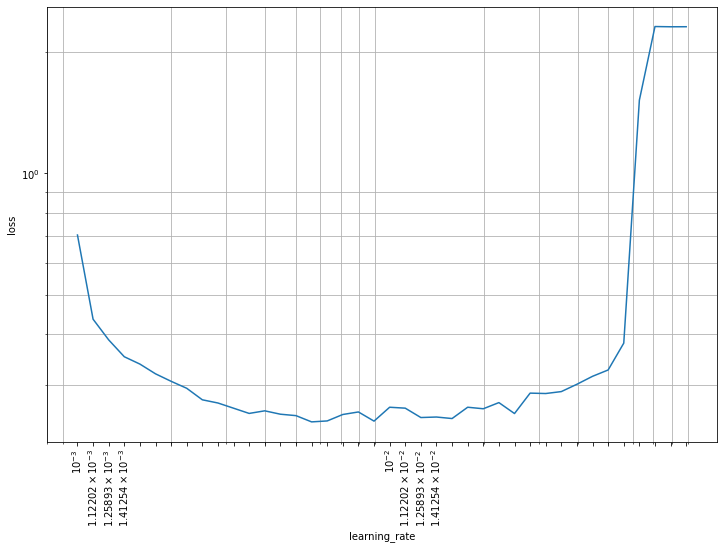

In [86]:
plt.figure(figsize=(12, 8))
ax = plt.plot(history_9_df.lr, history_9_df.loss)
plt.xlabel('learning_rate')
plt.ylabel('loss')
plt.xscale('log')
plt.yscale('log')
plt.xticks(lrs, rotation=90)
plt.grid(visible=True, which='minor', axis='both')
plt.show()

In [87]:
np.linspace(0.001, 0.1, 10)

array([0.001, 0.012, 0.023, 0.034, 0.045, 0.056, 0.067, 0.078, 0.089,
       0.1  ])

### Evaluating our multi-class classification model

We could:
* Evaluate its performance using other classificatio metrics
* Assess some of its predictions (through visualizations)

In [88]:
y_probs_8 = model_8.predict(test_data_norm)

In [89]:
y_preds_8 = y_probs_8.argmax(axis=1)

In [90]:
y_preds_8.shape, test_labels.shape

((10000,), (10000,))

In [91]:
y_probs_9 = model_9.predict(test_data_norm)

In [92]:
y_preds_9 = y_probs_9.argmax(axis=1)

In [93]:
y_preds_9

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

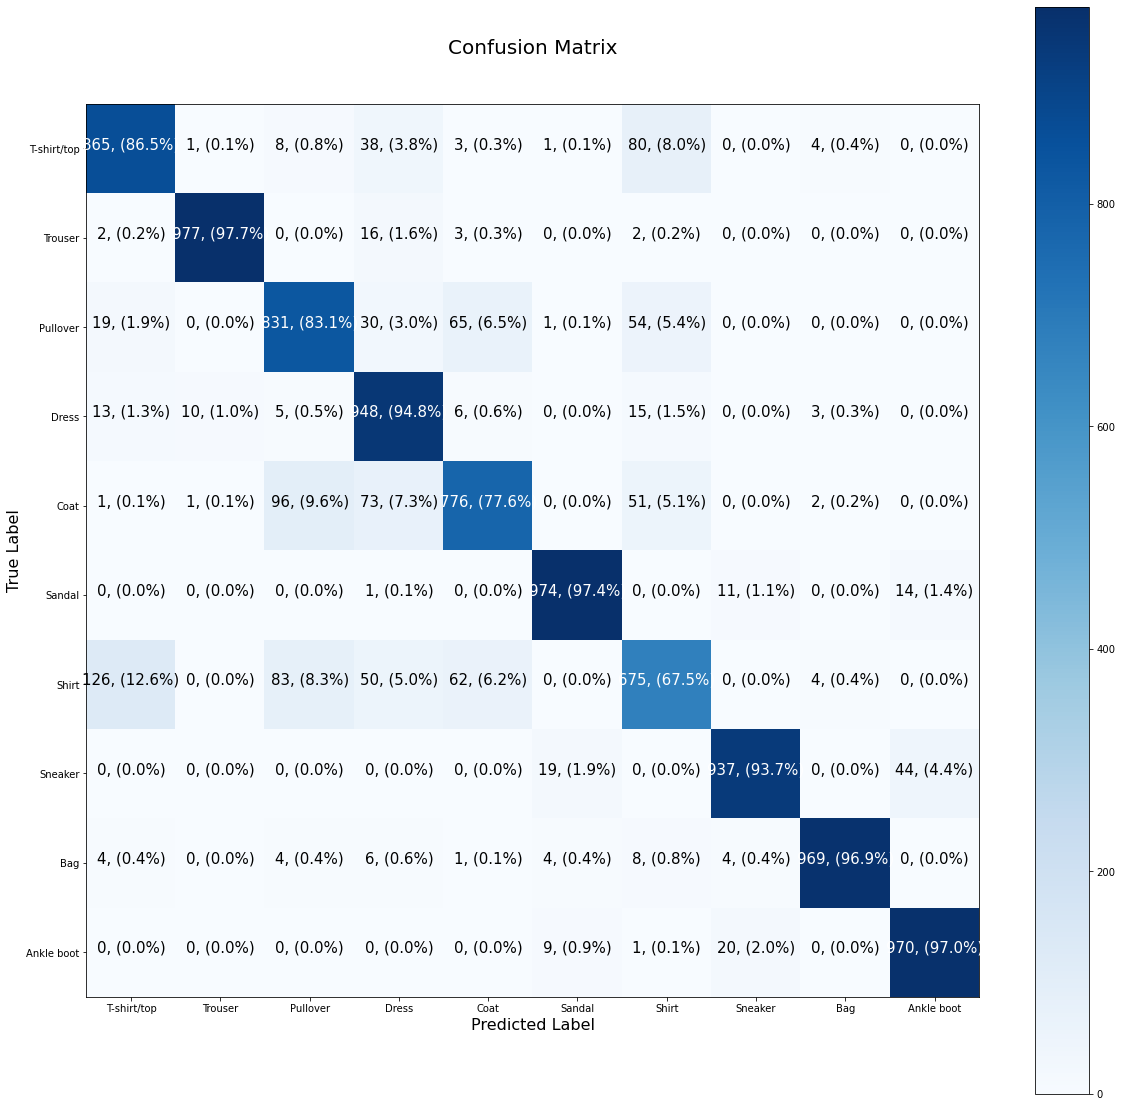

In [94]:
# Create a confusion matrix

plot_confusion_matrix(y_pred=y_preds_8, y_true=test_labels, classes=class_names, figsize=(20, 20))

In [191]:
def show_image_labels(num_pred=1, model=None, data=None, labels=None, figsize=(12, 12)):
    plt.figure(figsize=figsize)
    for i in range(num_pred):
        ax = plt.subplot(int(num_pred/round(np.sqrt(num_pred))+2), int(num_pred/round(np.sqrt(num_pred))), i+1)
        random_index = random.choice(range(len(data)))
        plt.imshow(data[random_index], cmap=plt.cm.binary)
        pred = model.predict(data[random_index].reshape(1, 28, 28))
        plt.title(f'Prediction:{class_names[pred.argmax(axis=1)]}\nTrue label: {class_names[labels[random_index]]}\nConfidence: {np.max(pred)}')
        plt.axis(False)

TypeError: only integer scalar arrays can be converted to a scalar index

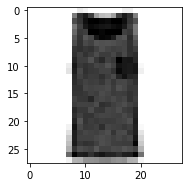

In [192]:
show_image_labels(num_pred=16, model=model_8, data=test_data_norm, labels=test_labels, figsize=(20, 20))

In [193]:
model_8.predict(test_data_norm[33].reshape(1, 28, 28)).argmax(axis=1)

array([3], dtype=int64)

### What patterns is our model learning?

In [194]:
model_8.layers

In [195]:
model_8.layers[1]

In [196]:
weights, biases = model_8.layers[1].get_weights()

In [198]:
weights.shape, biases.shape

((784, 784), (784,))

array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

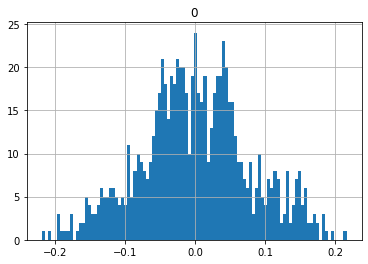

In [201]:
pd.DataFrame(weights[0]).hist(bins=100)

array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

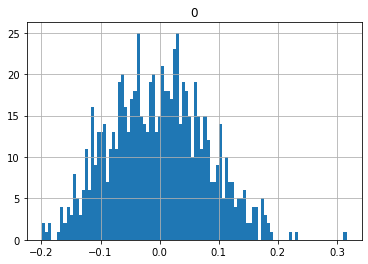

In [202]:
pd.DataFrame(weights[2]).hist(bins=100)

array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

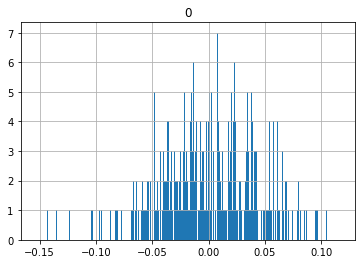

In [207]:
pd.DataFrame(weights[66]).hist(bins=784)

array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

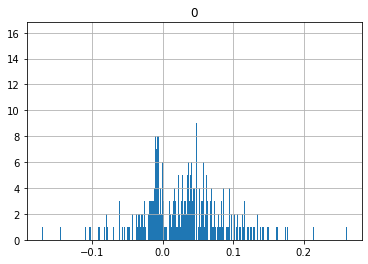

In [206]:
pd.DataFrame(biases).hist(bins=784)

In [209]:
from scipy.stats import rv_histogram 

In [212]:
histogram = rv_histogram(np.histogram(pd.DataFrame(biases), bins=784))

In [213]:
histogram

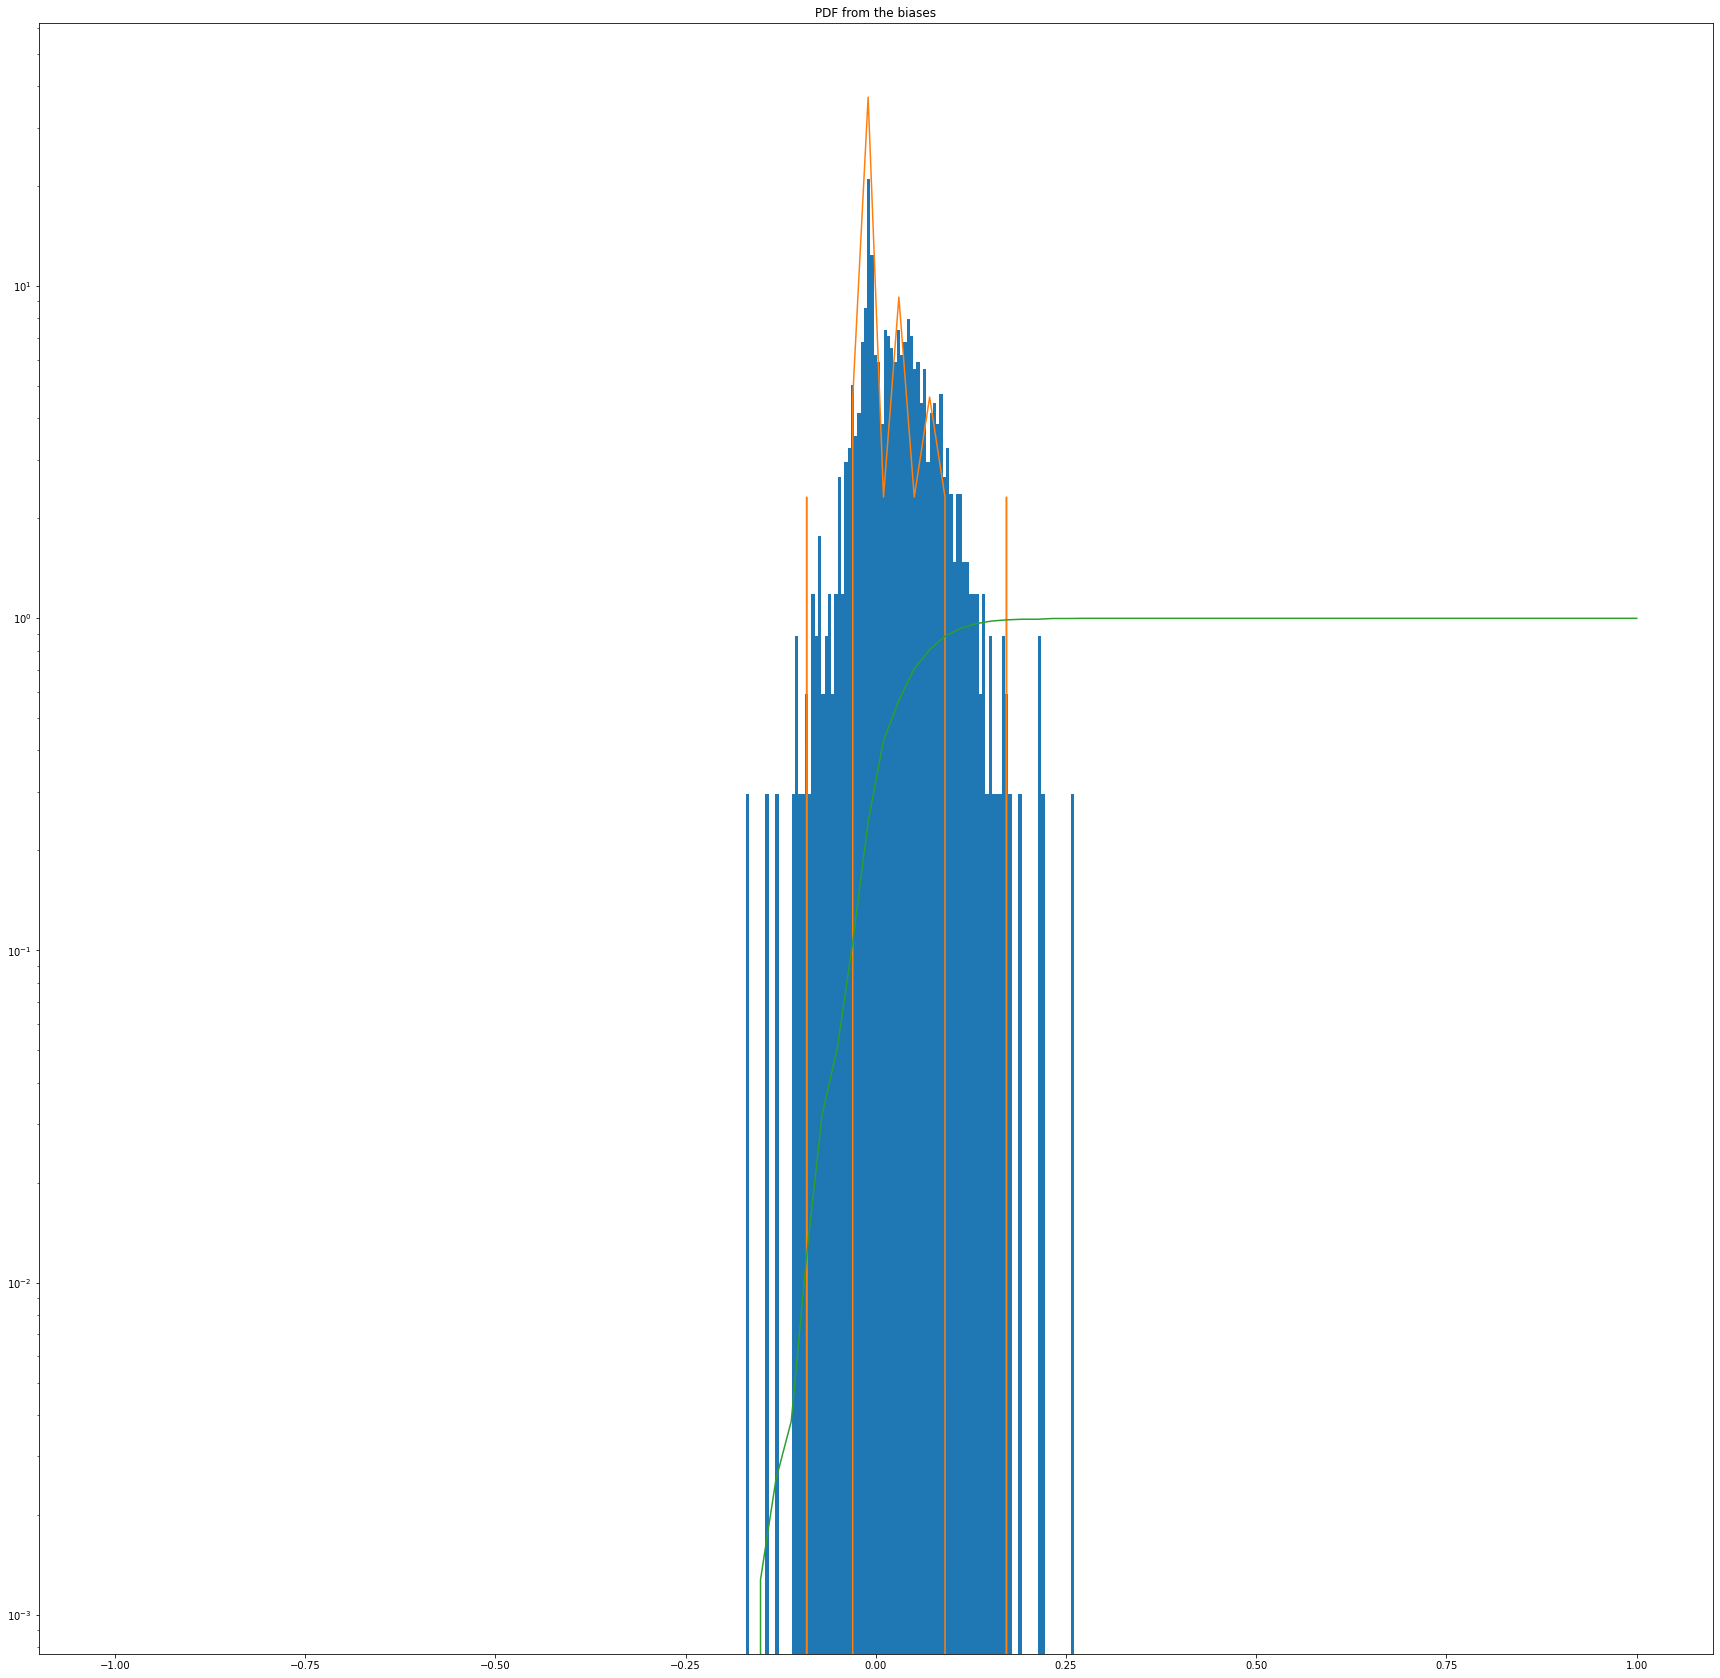

In [222]:
X = np.linspace(-1.0, 1.0, 100)
plt.figure(figsize=(30, 30))
plt.title("PDF from the biases")

plt.hist(biases, density=True, bins=100)

plt.plot(X, histogram.pdf(X), label='PDF')

plt.plot(X, histogram.cdf(X), label='CDF')

plt.yscale('log')

plt.show()

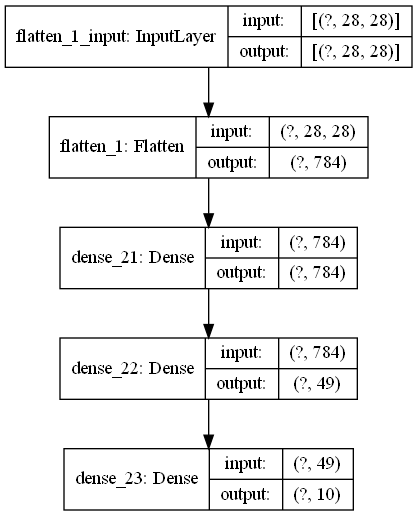

In [225]:
from tensorflow.keras.utils import plot_model

plot_model(model_8,show_shapes=True)

## Exercises 

### *Ex. 1*
Create a classification dataset using Scikit-Learn's make_moons() function, visualize it and then build a model to fit it at over 85% accuracy.
Train a model to get 88%+ accuracy on the fashion MNIST test set. Plot a confusion matrix to see the results after.

#### Produce the data

In [226]:
from sklearn.datasets import make_moons

In [241]:
# Create a data set 

X_moon, y_moon = make_moons(n_samples=17000, shuffle=True, noise=0.2, random_state=42)

In [242]:
X_moon.shape, y_moon.shape

((17000, 2), (17000,))

In [243]:
# Create a DataFrame

moons = pd.DataFrame({"X0":X_moon[:,0], "X1":X_moon[:, 1], "label":y_moon})

In [244]:
moons

,X0,X1,label
0,0.573893,-0.264525,1
1,-0.128789,1.122746,0
2,0.503021,-0.089164,1
3,0.562754,0.867293,0
4,-0.787868,0.818842,0
...,...,...,...
16995,0.500367,-0.437378,1
16996,0.660289,-0.582856,1
16997,-0.812840,1.042312,0
16998,0.804506,0.021373,0


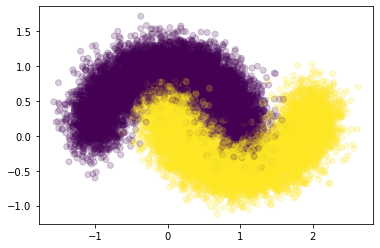

In [245]:
plt.scatter(moons.X0, moons.X1, c=moons.label, alpha=0.2)

In [246]:
X_moon_train, X_moon_test, y_moon_train, y_moon_test = train_test_split(X_moon, 
                                                                        y_moon, 
                                                                        test_size=0.25)

In [247]:
X_moon_train.shape, X_moon_test.shape, y_moon_train.shape, y_moon_test.shape 

((12750, 2), (4250, 2), (12750,), (4250,))

In [248]:
X_moon_train[11]

array([ 1.21181701, -0.39370967])

#### Create a model

In [253]:
# Set random seed
tf.random.set_seed(44)

# Create a model
model_ex1 = tf.keras.Sequential([
    tf.keras.layers.Dense(2, activation='selu'),
    tf.keras.layers.Dense(13, activation='selu'),
    tf.keras.layers.Dense(1, activation='sigmoid'),
])

# Compile the model
model_ex1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                 optimizer=tf.keras.optimizers.SGD(),
                 metrics=['accuracy'])

# Fit the model
history_ex1 = model_ex1.fit(X_moon_train, y_moon_train,
                           epochs=66, validation_data=(X_moon_test, y_moon_test))

Epoch 1/66
399/399 [==============================] - 0s 976us/step - loss: 0.4612 - accuracy: 0.7573 - val_loss: 0.3376 - val_accuracy: 0.8485
Epoch 2/66
399/399 [==============================] - 0s 697us/step - loss: 0.3015 - accuracy: 0.8662 - val_loss: 0.2847 - val_accuracy: 0.8760
Epoch 3/66
399/399 [==============================] - 0s 693us/step - loss: 0.2784 - accuracy: 0.8806 - val_loss: 0.2765 - val_accuracy: 0.8800
Epoch 4/66
399/399 [==============================] - 0s 712us/step - loss: 0.2718 - accuracy: 0.8841 - val_loss: 0.2706 - val_accuracy: 0.8840
Epoch 5/66
399/399 [==============================] - 0s 702us/step - loss: 0.2655 - accuracy: 0.8872 - val_loss: 0.2644 - val_accuracy: 0.8873
Epoch 6/66
399/399 [==============================] - 0s 696us/step - loss: 0.2588 - accuracy: 0.8893 - val_loss: 0.2582 - val_accuracy: 0.8911
Epoch 7/66
399/399 [==============================] - 0s 686us/step - loss: 0.2522 - accuracy: 0.8936 - val_loss: 0.2511 - val_accuracy:

This is binary classification problem


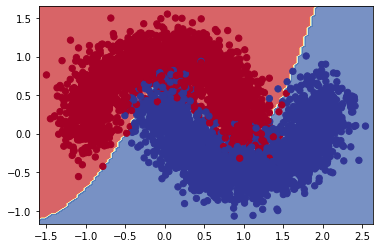

In [254]:
plot_decision_boundary(model=model_ex1, X=X_moon_test, y=y_moon_test)